In [1]:
using Plots

In [34]:
σ=0.1
n=100000
ε = randn(n)*σ
y = zeros(n)

function get_V(α, β)
    return (x)-> α*x + β
end

V = get_V(0.1, 1)


y[1]=ε[1]
for t in 2:n
    y[t] = ε[t]*V(y[t-1])
end

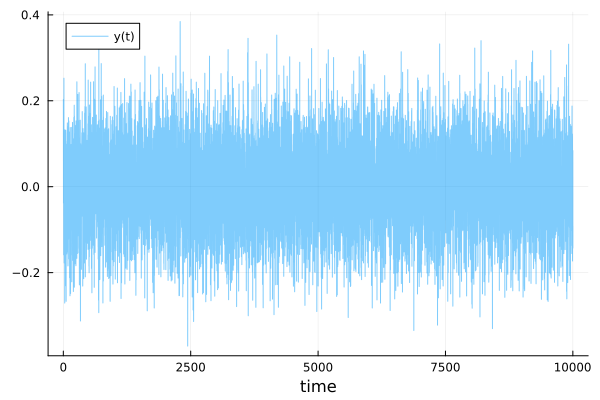

In [50]:
plot(y[end-10000:end], label="y(t)", alpha=0.5)
plot!(xlabel="time")

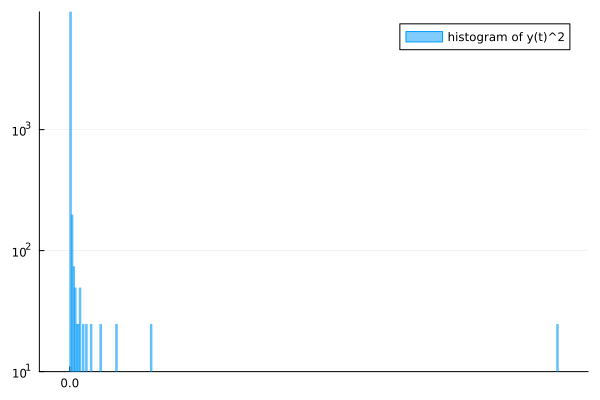

In [92]:
h=histogram(1 .+ y.^2, nbins=500, normed=true, xaxis=:log, yaxis=:log, linecolor=:match, label="histogram of y(t)^2", alpha=0.5)
plot!(xticks=([1,1.1,1.2,1.3,1.4, 1.5],[0,0.1,0.2,0.3,0.4,0.5]), legend=:topright)

In [91]:
using StatsBase
f=fit(Histogram, 1 .+ y.^2, nbins=500)


Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  1.0:0.0001:1.0313
weights: [383, 8, 3, 2, 1, 1, 2, 0, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
closed: left
isdensity: false

In [90]:
x = collect((f.edges)[1])
X = hcat([x ones(size(x))])
y = f.weights / n
y[10:300] \ X[10:300,:]

1×2 transpose(::Vector{Float64}) with eltype Float64:
 102.926  101.084

In [88]:
hcat([x ones(size(x))])

408×2 Matrix{Float64}:
 1.0     1.0
 1.0005  1.0
 1.001   1.0
 1.0015  1.0
 1.002   1.0
 1.0025  1.0
 1.003   1.0
 1.0035  1.0
 1.004   1.0
 1.0045  1.0
 ⋮       
 1.1995  1.0
 1.2     1.0
 1.2005  1.0
 1.201   1.0
 1.2015  1.0
 1.202   1.0
 1.2025  1.0
 1.203   1.0
 1.2035  1.0